<a href="https://colab.research.google.com/github/Nannanpeng/Econ_Dynamic_Programming/blob/master/Schelling%E2%80%99s_Segregation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
np.random.seed(1234)
n = 250
types = np.array(['orange', 'green']*n)
np.random.shuffle(types)
locations = np.array([np.random.random(2) for _ in range(n*2)])

In [3]:
def Happy(loc, self_type, locations, types):
  euc_dis = np.linalg.norm(locations-loc, axis=1)
  dis_indices = np.argsort(euc_dis)[1:11]
  nei_types = types[dis_indices]
  if (nei_types==self_type).sum() >= 5:    
    return True
  else:
    return False

def Cycle(locations, types):
  locs = np.copy(locations)
  for i in range(len(types)):
    while not Happy(locs[i], types[i], locs, types):
      locs[i] = np.random.random(2)
  return locs

def Convergence(locs, types, max_iter=50):
  convergence = False
  count = 0
  while not convergence and count < 50:
    new_locs = Cycle(locs, types)
    count += 1
    if np.isclose(new_locs, locs).all():
      convergence = True
    locs = new_locs
  if count == max_iter:
    raise RuntimeError('Iteration Failed!')
  return locs

In [4]:
locs = Convergence(locations, types)

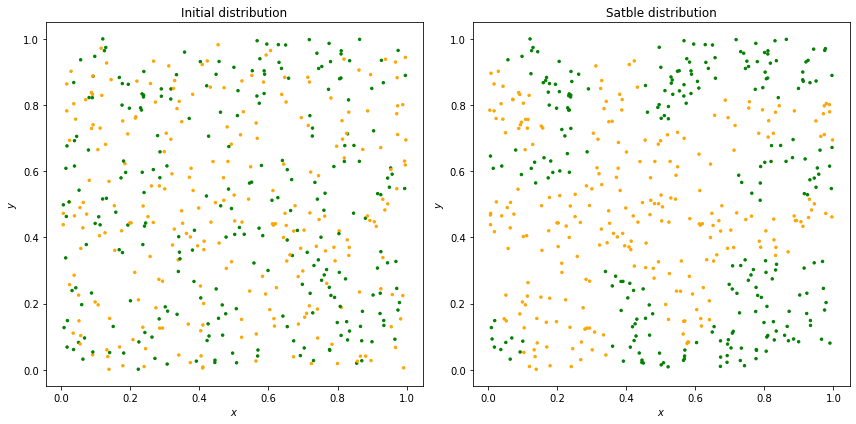

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for ax, title, vals in zip(axes.flatten(), ['Initial', 'Satble'], [locations, locs]):
  ax.scatter(vals[:, 0], vals[:, 1], s=6, c=types)
  ax.set(xlabel="$x$", ylabel="$y$", title=f"{title} distribution")
fig.tight_layout();